# Load Probe Data

This examples loads probe data, both for an experiment where the probes are run with a sweeping voltage and one where they are at a fixed bias voltage. 

In [1]:
from north_diagnostics import Probe
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'north_diagnostics'

## Sweeped Bias Voltage

In [ ]:
path = "/mnt/c/Users/alec/Data/NORTH/ProbeSim_2025/Hydrogen/DDAQ/"
shot = 9774

🔄 Loading configuration for Shot #9774 : Probe 30
🔄 Loading data for Shot #9774 : Probe 30
🔄 Loading channel for Shot #9774 : Probe 30


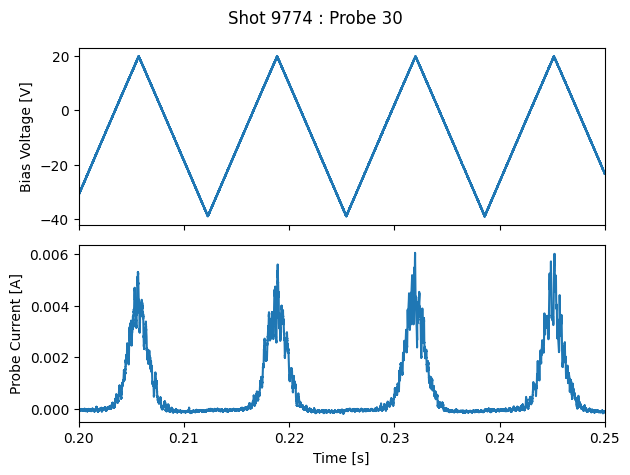

In [ ]:
probe = Probe(path = path, shot = shot, number = 30)

# Define the time range for analysis in seconds
t_start, t_end = 0.20, 0.25 # s

# Get the indices corresponding to the specified time range
idx_start, idx_end = probe.get_time_indices(t_start, t_end)

# Create a figure with two subplots sharing the x-axis
fig, ax = plt.subplots(2, sharex=True)

# Plot the bias voltage over the specified time range
ax[0].plot(probe.time[idx_start:idx_end], probe.bias_voltage[idx_start:idx_end])

# Plot the probe current over the specified time range
ax[1].plot(probe.time[idx_start:idx_end], probe.current[idx_start:idx_end])

# Set the x-axis limits to the specified time range
ax[1].set_xlim(t_start, t_end)

# Label the y-axes for each subplot
ax[0].set_ylabel("Bias Voltage [V]")
ax[1].set_ylabel("Probe Current [A]")

# Label the x-axis for the second subplot
ax[1].set_xlabel("Time [s]")

# Add a title to the figure indicating the shot and probe number
fig.suptitle(f"Shot {probe.shot} : Probe {probe.number}")
fig.tight_layout()


Text(0.5, 1.0, 'Shot 9774 : Probe 30 I-V Characteristic')

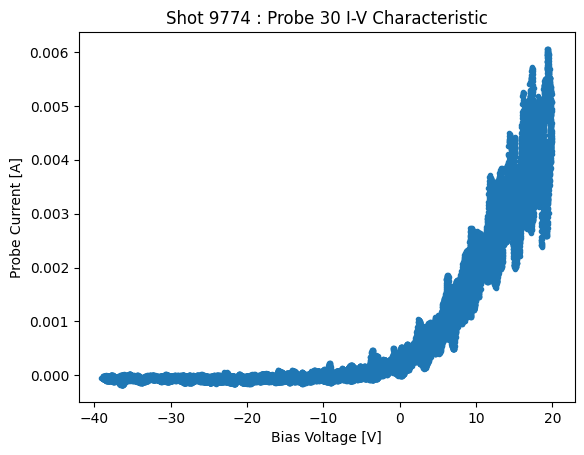

In [ ]:
fig, ax = plt.subplots()
ax.plot(probe.bias_voltage[idx_start:idx_end], probe.current[idx_start:idx_end], '.')
ax.set_xlabel("Bias Voltage [V]")
ax.set_ylabel("Probe Current [A]")
ax.set_title(f"Shot {probe.shot} : Probe {probe.number} I-V Characteristic")

## Fixed Bias Voltage

In [ ]:
path = "/mnt/c/Users/alec/Data/NORTH/ProbeSim_2025/Hydrogen/DDAQ/"
shot = 9804

🔄 Loading configuration for Shot #9804 : Probe 30
🔄 Loading data for Shot #9804 : Probe 30
🔄 Loading channel for Shot #9804 : Probe 30


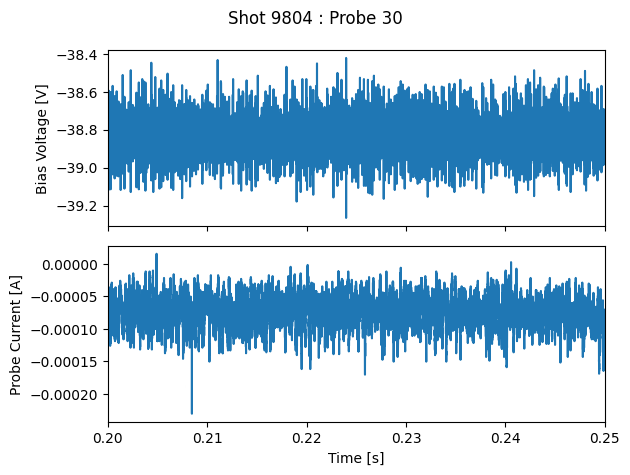

In [ ]:
probe = Probe(path = path, shot = shot, number = 30)

# Define the time range for analysis in seconds
t_start, t_end = 0.20, 0.25 # s

# Get the indices corresponding to the specified time range
idx_start, idx_end = probe.get_time_indices(t_start, t_end)

# Create a figure with two subplots sharing the x-axis
fig, ax = plt.subplots(2, sharex=True)

# Plot the bias voltage over the specified time range
ax[0].plot(probe.time[idx_start:idx_end], probe.bias_voltage[idx_start:idx_end])

# Plot the probe current over the specified time range
ax[1].plot(probe.time[idx_start:idx_end], probe.current[idx_start:idx_end])

# Set the x-axis limits to the specified time range
ax[1].set_xlim(t_start, t_end)

# Label the y-axes for each subplot
ax[0].set_ylabel("Bias Voltage [V]")
ax[1].set_ylabel("Probe Current [A]")

# Label the x-axis for the second subplot
ax[1].set_xlabel("Time [s]")

# Add a title to the figure indicating the shot and probe number
fig.suptitle(f"Shot {probe.shot} : Probe {probe.number}")
fig.tight_layout()

In [ ]:
def plot_global_current(t, dt):
    from scipy.interpolate import griddata, RBFInterpolator
    print(f"Analysing shot #{shot}")

    # make scatter with colorbars and contour behind it, first at time t, later an animation
    data = {}
    for i in range(Probe.TOTAL_PROBES):
        probe = Probe(path = path, shot = shot, number = i + 1, caching = True)
        if probe.active:
            data[i] = {}
            data[i]['r'] = probe.position['r']
            data[i]['z'] = probe.position['z']
            data[i]['c'] = probe.current

    grid_r, grid_z = np.meshgrid(np.linspace(250-130, 250+130, 100), np.linspace(0-130, 0+130, 100))
    mask = (grid_r - 250)**2 + (grid_z - 0)**2 > 130**2
    k = 2 # no. standard deviations to plot

    r, z = [], []
    for i in range(Probe.TOTAL_PROBES):
        if i not in data.keys(): continue
        r.append(data[i]['r'])
        z.append(data[i]['z'])

    probe = Probe(path = path, shot = shot, number = 1, caching = True)
    # grid_c = griddata((r, z), c, (grid_r, grid_z), method='nearest')
        
    c, c_rel = [], []
    for i in range(Probe.TOTAL_PROBES):
        if i not in data.keys(): continue
        idx_start, idx_end = probe.get_time_indices(t, t + dt)
        c.append(np.mean(data[i]['c'][idx_start:idx_end]))
        c_rel.append(np.mean(data[i]['c'][idx_start:idx_end])/np.mean(data[i]['c']) - 1)

    c_interpolator, c_rel_interpolator = RBFInterpolator(np.column_stack((r, z)), c, neighbors=7), RBFInterpolator(np.column_stack((r, z)), c_rel, neighbors=7)
    grid_c, grid_c_rel = c_interpolator(np.column_stack((grid_r.ravel(), grid_z.ravel()))).reshape(grid_r.shape), c_rel_interpolator(np.column_stack((grid_r.ravel(), grid_z.ravel()))).reshape(grid_r.shape)


    # grid_c[mask] = np.nan  # Set outside the circle to NaN
    grid_c[mask], grid_c_rel[mask] = np.nan, np.nan  # Set outside the circle to NaN

    fig, ax = plt.subplots(1, 2, sharey = True, figsize=(16/2, 9/2), dpi = 300)

    theta = np.linspace(0, 2 * np.pi, 500)
    circle_x = 250 + 130 * np.cos(theta)
    circle_z = 130 * np.sin(theta)

    ax[0].plot(circle_x, circle_z, 'k')
    ax[0].set_aspect('equal', adjustable='box')

    ax[1].plot(circle_x, circle_z, 'k')
    ax[1].set_aspect('equal', adjustable='box')

    signal = np.concatenate([data[i]['c'] for i in data.keys()])
    mean, std = np.mean(signal), np.std(signal)
    vmin, vmax = mean - k*std, mean + k*std

    ax[0].contourf(grid_r, grid_z, grid_c*1e3, levels = 50, cmap = 'inferno_r', vmin = vmin*1e3, vmax = vmax*1e3)
    scatter = ax[0].scatter(r, z, c = [i*1e3 for i in c ], marker='o', edgecolors='k', cmap = 'inferno_r', vmin = vmin*1e3, vmax = vmax*1e3)

    cbar = plt.colorbar(scatter, orientation='horizontal')
    cbar.set_label('Ion Saturation Current [mA]')
    cbar.ax.invert_xaxis()

    vmin, vmax = -k*std/np.abs(mean), k*std/np.abs(mean)

    ax[1].contourf(grid_r, grid_z, grid_c_rel, levels = 50, cmap = 'RdBu', vmin = vmin, vmax = vmax)
    scatter = ax[1].scatter(r, z, c = c_rel, marker='o', edgecolors='k', cmap = 'RdBu', vmin = vmin, vmax = vmax)

    cbar = plt.colorbar(scatter, orientation='horizontal')
    cbar.set_label('Relative fluctuation [-]')
    cbar.ax.invert_xaxis()

    ax[0].set_xlabel('r [mm]')
    ax[0].set_ylabel('z [mm]')

    ax[1].set_xlabel('r [mm]')

    fig.suptitle(f"#{shot} : Averaged Ion Saturation Current in a t = {t:.2e}, dt = {dt:.2e} s")

Analysing shot #9804
🔄 Accessing cached data for Shot #9804 : Probe 1
🔄 Accessing cached data for Shot #9804 : Probe 2
🔄 Accessing cached data for Shot #9804 : Probe 3
🔄 Accessing cached data for Shot #9804 : Probe 4
🔄 Accessing cached data for Shot #9804 : Probe 5
🔄 Accessing cached data for Shot #9804 : Probe 6
🔄 Accessing cached data for Shot #9804 : Probe 7
🔄 Accessing cached data for Shot #9804 : Probe 8
🔄 Accessing cached data for Shot #9804 : Probe 9
🔄 Accessing cached data for Shot #9804 : Probe 10
🔄 Accessing cached data for Shot #9804 : Probe 11
🔄 Accessing cached data for Shot #9804 : Probe 13
🔄 Accessing cached data for Shot #9804 : Probe 14
🔄 Accessing cached data for Shot #9804 : Probe 15
🔄 Accessing cached data for Shot #9804 : Probe 16
🔄 Accessing cached data for Shot #9804 : Probe 17
🔄 Accessing cached data for Shot #9804 : Probe 18
🔄 Accessing cached data for Shot #9804 : Probe 19
🔄 Accessing cached data for Shot #9804 : Probe 20
🔄 Accessing cached data for Shot #9804

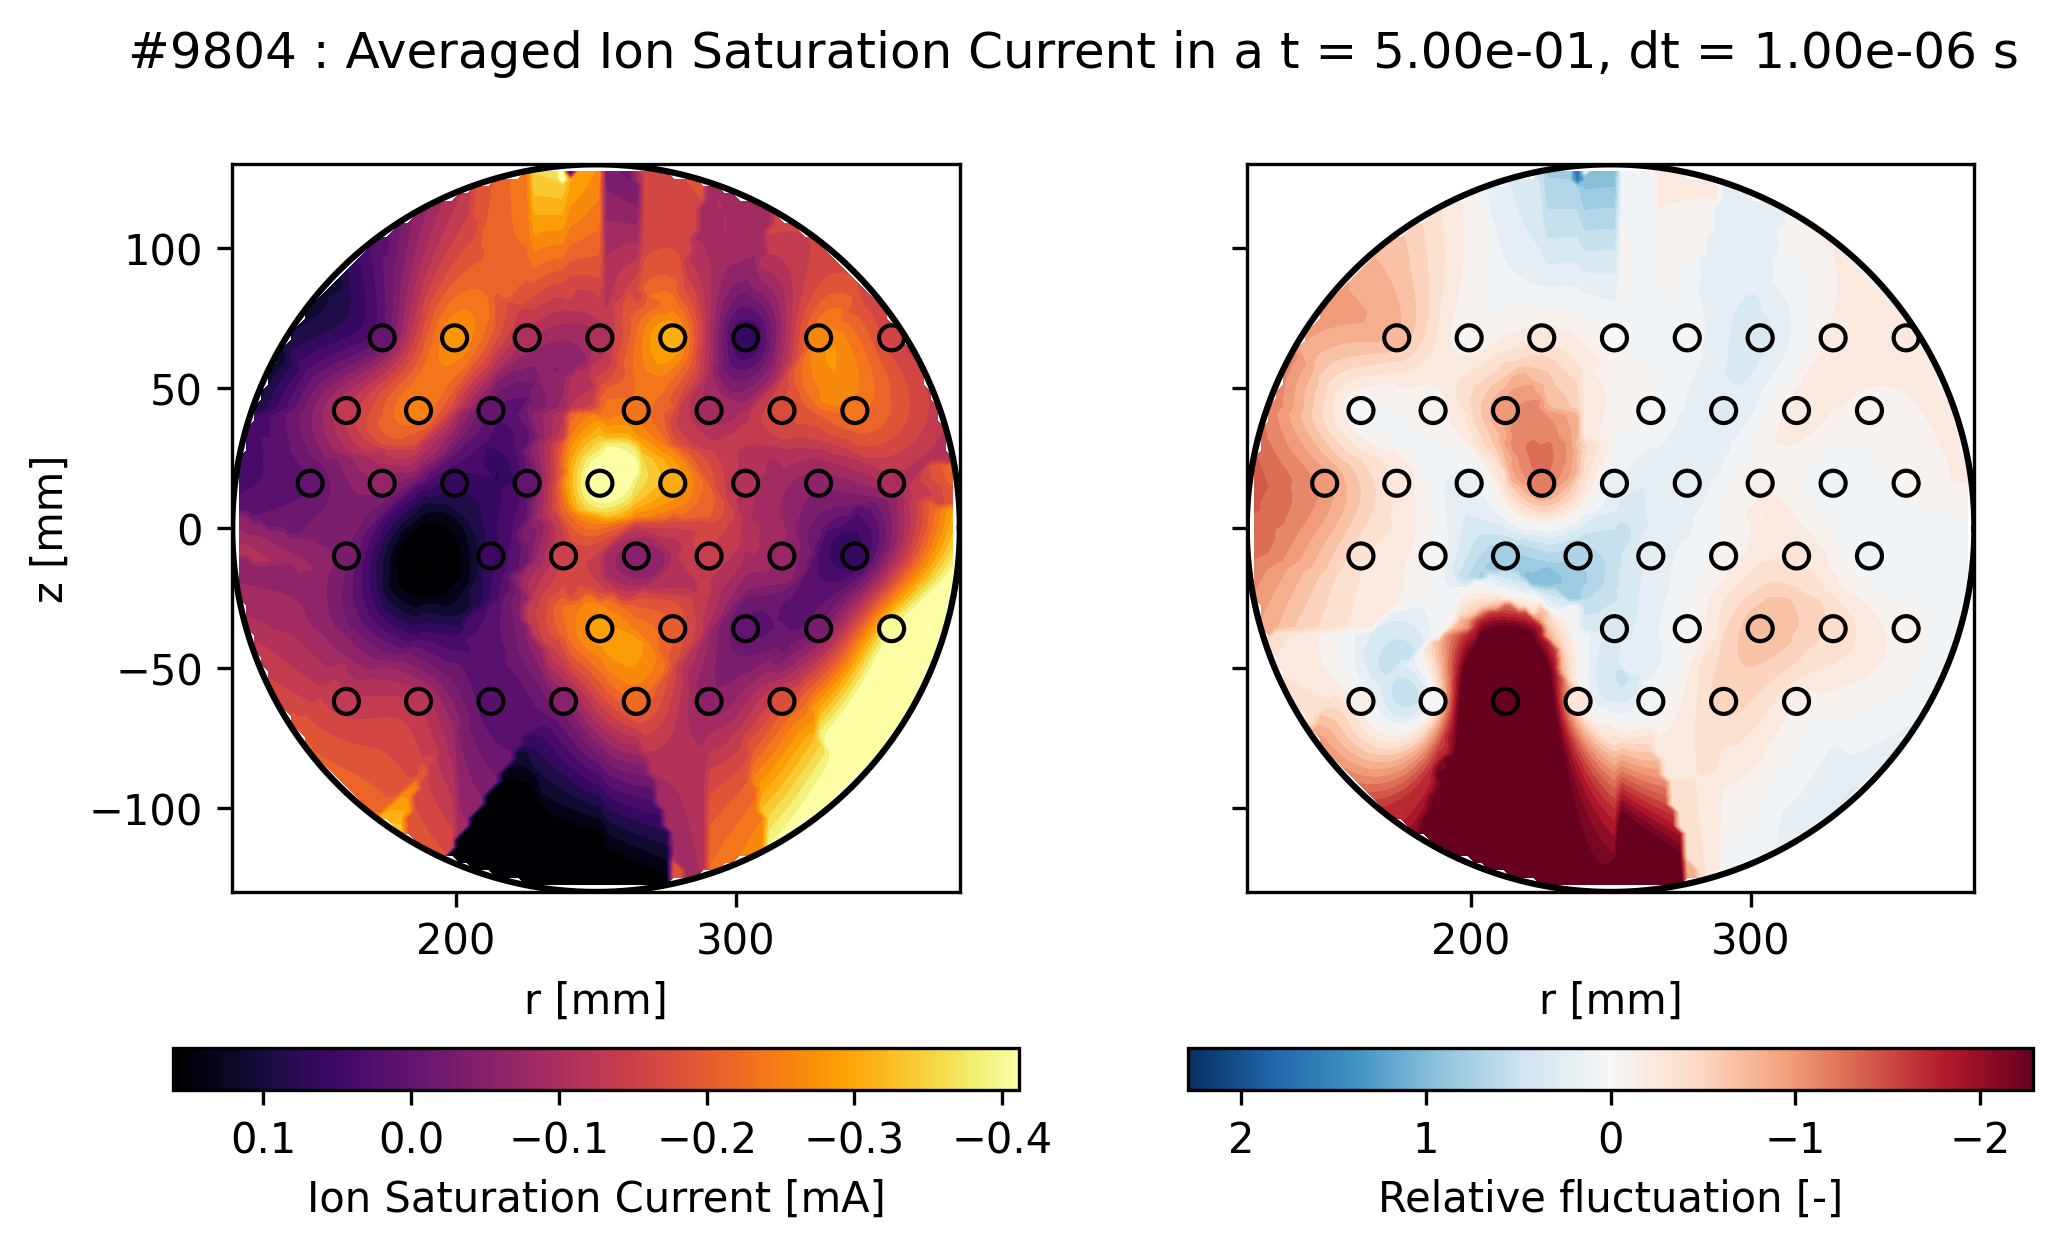

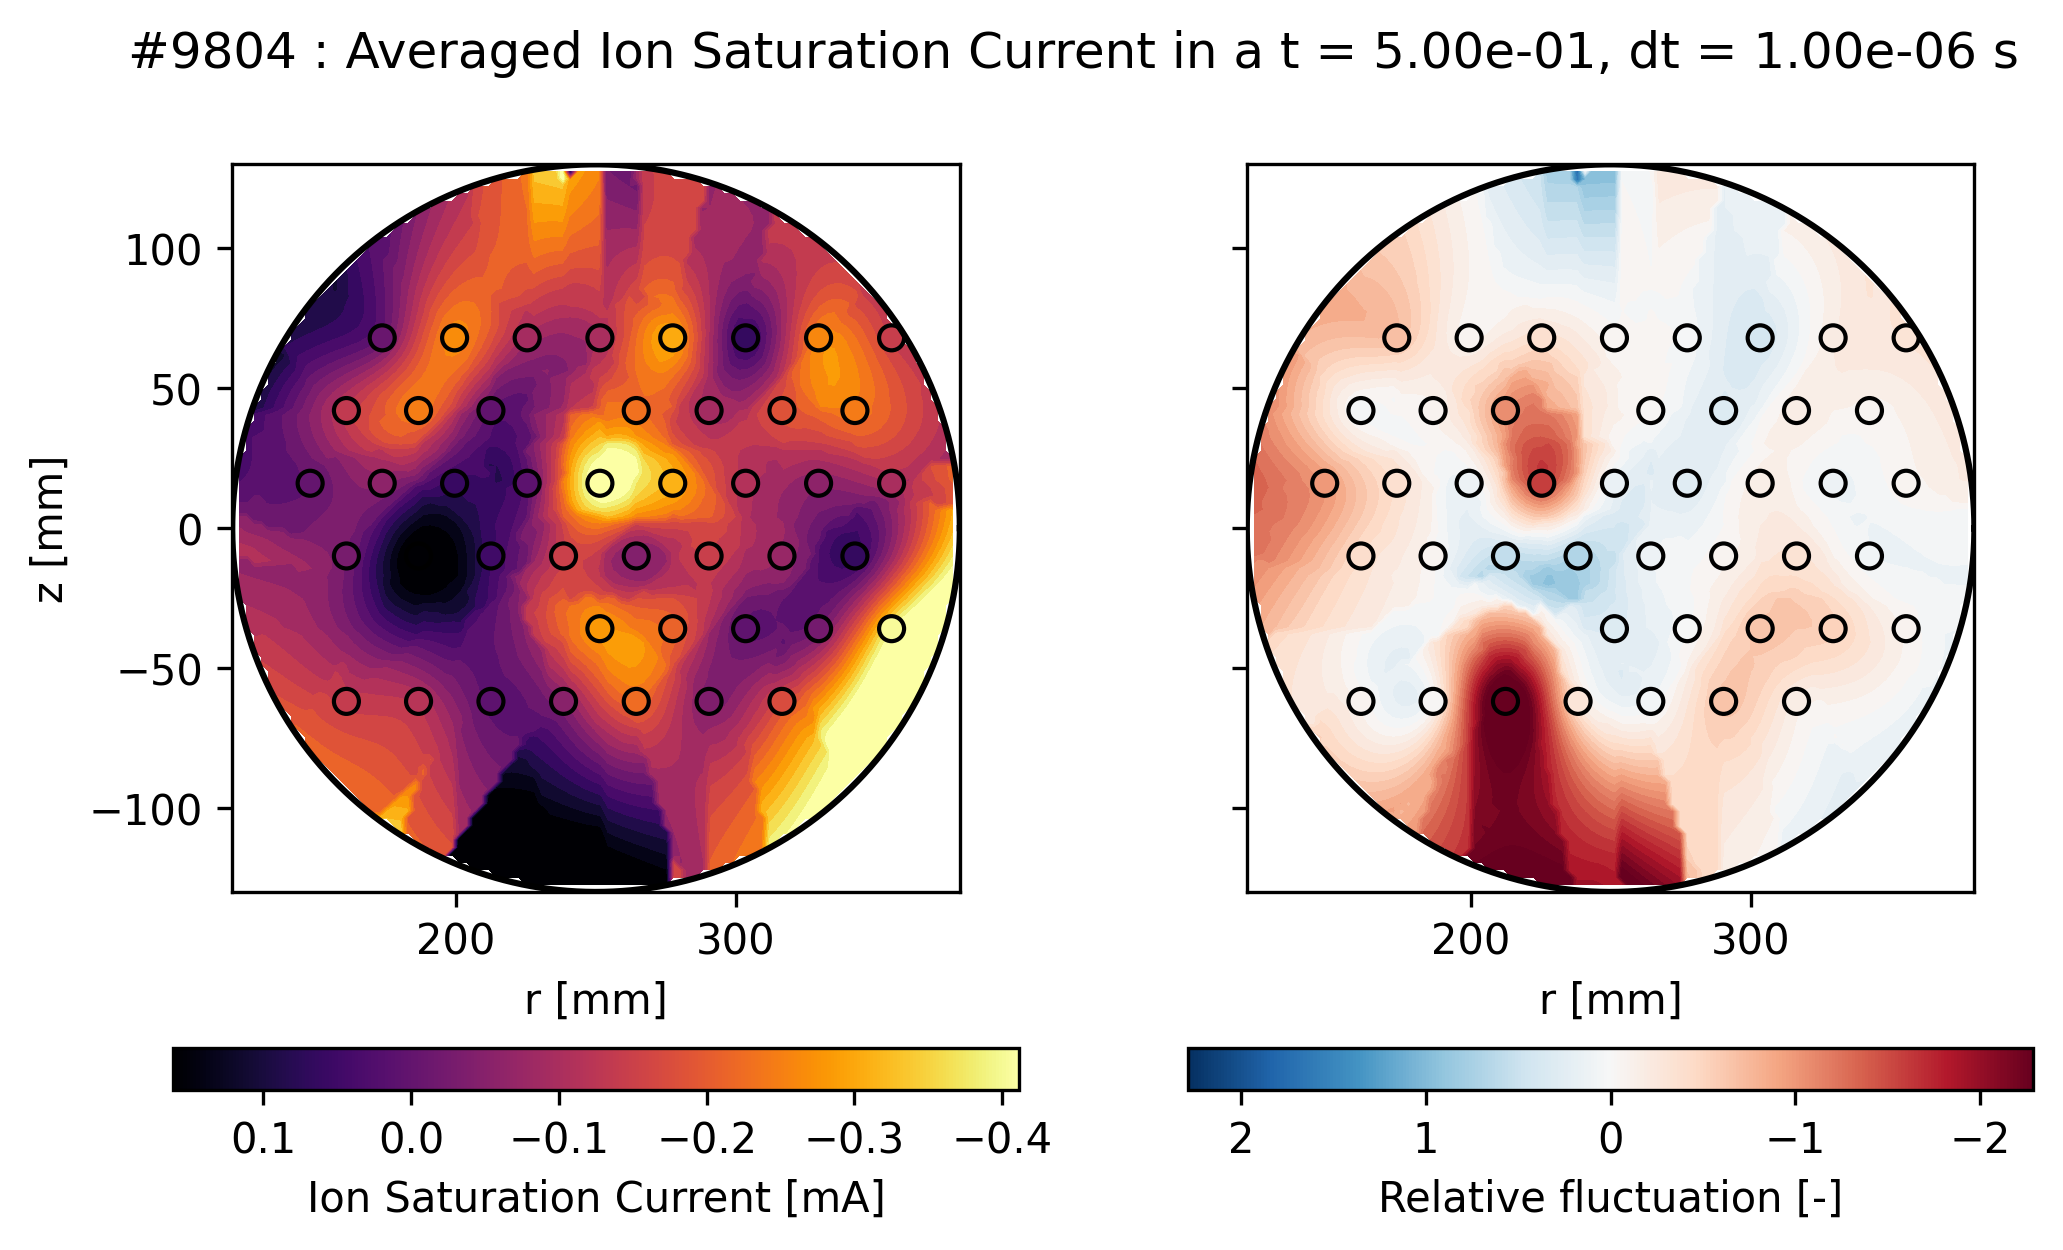

In [ ]:
t, dt = 0.5, 1e-6
for i in range(10):
    plot_global_current(0.5 + i*dt, dt)

In [ ]:
data.keys()

In [ ]:
data[11]

In [ ]:
shot = 9804
t, dt = 0, 1

In [ ]:
# make scatter with colorbars and contour behind it, first at time t, later an animation
data = {}
for i in range(Probe.TOTAL_PROBES):
    probe = Probe(path = path, shot = shot, number = i + 1, caching=True)
    if probe.active:
        data[i] = {}
        data[i]['r'] = probe.position['r']
        data[i]['z'] = probe.position['z']
        data[i]['c'] = probe.current

In [ ]:
from scipy.interpolate import griddata, RBFInterpolator

out_dir = "/mnt/c/Users/alec/Data/NORTH/ProbeSim_2025/Hydrogen/Analysis"

grid_r, grid_z = np.meshgrid(np.linspace(250-130, 250+130, 100), np.linspace(0-130, 0+130, 100))
mask = (grid_r - 250)**2 + (grid_z - 0)**2 > 130**2
k = 2 # no. standard deviations to plot

r, z = [], []
for i in range(Probe.TOTAL_PROBES):
    if i not in data.keys(): continue
    r.append(data[i]['r'])
    z.append(data[i]['z'])

probe = Probe(path = path, shot = shot, number = 1)
# grid_c = griddata((r, z), c, (grid_r, grid_z), method='nearest')

for t0 in [0.1*i for i in range(1, 10, 2)]:
    # t0, dt = 0.5, 1e-6
    dt = 10*1e-6
    for num, t in enumerate([t0+i*dt for i in range(100)]):
        
        c, c_rel = [], []
        for i in range(Probe.TOTAL_PROBES):
            if i not in data.keys(): continue
            idx_start, idx_end = probe.get_time_indices(t, t + dt)
            c.append(np.mean(data[i]['c'][idx_start:idx_end]))
            c_rel.append(np.mean(data[i]['c'][idx_start:idx_end])/np.mean(data[i]['c']) - 1)

        c_interpolator, c_rel_interpolator = RBFInterpolator(np.column_stack((r, z)), c, neighbors=7), RBFInterpolator(np.column_stack((r, z)), c_rel, neighbors=7)
        grid_c, grid_c_rel = c_interpolator(np.column_stack((grid_r.ravel(), grid_z.ravel()))).reshape(grid_r.shape), c_rel_interpolator(np.column_stack((grid_r.ravel(), grid_z.ravel()))).reshape(grid_r.shape)


        # grid_c[mask] = np.nan  # Set outside the circle to NaN
        grid_c[mask], grid_c_rel[mask] = np.nan, np.nan  # Set outside the circle to NaN

        fig, ax = plt.subplots(1, 2, sharey = True, figsize=(16/2, 9/2), dpi = 300)

        theta = np.linspace(0, 2 * np.pi, 500)
        circle_x = 250 + 130 * np.cos(theta)
        circle_z = 130 * np.sin(theta)

        ax[0].plot(circle_x, circle_z, 'k')
        ax[0].set_aspect('equal', adjustable='box')
        
        ax[1].plot(circle_x, circle_z, 'k')
        ax[1].set_aspect('equal', adjustable='box')

        signal = np.concatenate([data[i]['c'] for i in data.keys()])
        mean, std = np.mean(signal), np.std(signal)
        vmin, vmax = mean - k*std, mean + k*std

        ax[0].contourf(grid_r, grid_z, grid_c*1e3, levels = 50, cmap = 'inferno_r', vmin = vmin*1e3, vmax = vmax*1e3)
        scatter = ax[0].scatter(r, z, c = [i*1e3 for i in c ], marker='o', edgecolors='k', cmap = 'inferno_r', vmin = vmin*1e3, vmax = vmax*1e3)

        cbar = plt.colorbar(scatter, orientation='horizontal')
        cbar.set_label('Ion Saturation Current [mA]')
        cbar.ax.invert_xaxis()

        vmin, vmax = -k*std/np.abs(mean), k*std/np.abs(mean)

        ax[1].contourf(grid_r, grid_z, grid_c_rel, levels = 50, cmap = 'RdBu', vmin = vmin, vmax = vmax)
        scatter = ax[1].scatter(r, z, c = c_rel, marker='o', edgecolors='k', cmap = 'RdBu', vmin = vmin, vmax = vmax)

        cbar = plt.colorbar(scatter, orientation='horizontal')
        cbar.set_label('Relative fluctuation [-]')
        cbar.ax.invert_xaxis()

        ax[0].set_xlabel('r [mm]')
        ax[0].set_ylabel('z [mm]')

        ax[1].set_xlabel('r [mm]')
        # ax[1].set_ylabel('z [mm]')

        fig.suptitle(f"Ion Saturation Current at t = {t0:0.1f} s + {(t-t0)*1e3:.2f} ms")
        # fig.tight_layout()

        fig.savefig(out_dir + f"/{shot}__probes__{t0:.1f}_{num}.png")

